In [2]:
# general starter imports

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style 

%matplotlib inline

# read file

import os
for dirname, _, filenames in os.walk(r'C:\Users\kesha\SeqComparison\proteomes\arabidopsis\light_and_dark_protein_list.tsv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

prot_list = pd.read_csv(r'C:\Users\kesha\SeqComparison\proteomes\arabidopsis\light_and_dark_protein_list.tsv', sep='\t')

print(prot_list.head())
print(prot_list.info())


    identifier gene_name  chromosome     status  n_obs  molecular_weight  \
0  AT1G01010.1      NAC1           1  canonical      4         49.425217   
1  AT1G01030.1      NGA3           1  canonical     12         40.287041   
2  AT1G01040.1      DCL1           1  canonical     40        213.571183   
3  AT1G01050.1     IPYR1           1  canonical     66         24.483778   
4  AT1G01060.1       LHY           1  canonical     17         70.437242   

      gravy        pI                                        description  
0 -0.731469  5.101322                    NAC domain containing protein 1  
1 -0.815922  5.863363  AP2/B3-like transcriptional factor family protein  
2 -0.416186  5.877288                                       dicer-like 1  
3 -0.448113  5.733031                                pyrophosphorylase 1  
4 -0.745581  5.765202               Homeodomain-like superfamily protein  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23973 entries, 0 to 23972
Data columns (tot

In [3]:
prot_list.describe()


,chromosome,n_obs,molecular_weight,gravy,pI
count,23973.000000,23973.000000,23973.000000,23973.000000,23973.000000
mean,2.933425,27.048638,45.787555,-0.311073,7.284704
std,1.505839,47.250128,33.874573,0.398941,1.804809
min,1.000000,0.000000,0.149211,-2.844444,4.050028
25%,1.000000,2.000000,22.735039,-0.549573,5.688071
50%,3.000000,12.000000,39.164019,-0.299074,6.936426
75%,4.000000,33.000000,58.847639,-0.094269,8.965570
max,5.000000,1113.000000,611.149394,2.191045,11.999968


In [4]:
prot_list_canonical = prot_list[prot_list["status"] == "canonical"]

In [5]:
prot_list_canonical.head()

,identifier,gene_name,chromosome,status,n_obs,molecular_weight,gravy,pI,description
0,AT1G01010.1,NAC1,1,canonical,4,49.425217,-0.731469,5.101322,NAC domain containing protein 1
1,AT1G01030.1,NGA3,1,canonical,12,40.287041,-0.815922,5.863363,AP2/B3-like transcriptional factor family protein
2,AT1G01040.1,DCL1,1,canonical,40,213.571183,-0.416186,5.877288,dicer-like 1
3,AT1G01050.1,IPYR1,1,canonical,66,24.483778,-0.448113,5.733031,pyrophosphorylase 1
4,AT1G01060.1,LHY,1,canonical,17,70.437242,-0.745581,5.765202,Homeodomain-like superfamily protein


array([[<AxesSubplot:title={'center':'chromosome'}>,
        <AxesSubplot:title={'center':'n_obs'}>],
       [<AxesSubplot:title={'center':'molecular_weight'}>,
        <AxesSubplot:title={'center':'gravy'}>],
       [<AxesSubplot:title={'center':'pI'}>, <AxesSubplot:>]],
      dtype=object)

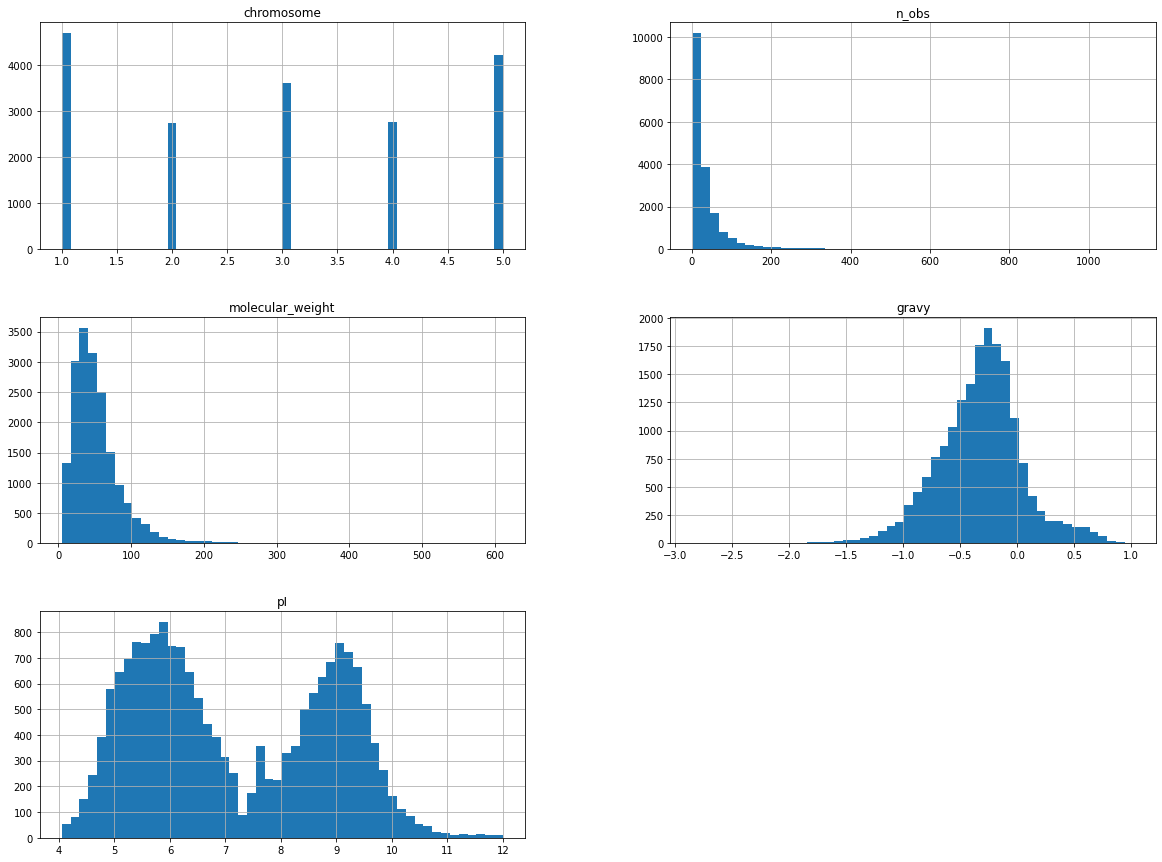

In [6]:
prot_list_canonical.hist(bins=50, figsize=(20,15))


In [7]:
prot_list_other = prot_list[prot_list["status"] != "canonical"]

In [8]:
prot_list_other.head()

,identifier,gene_name,chromosome,status,n_obs,molecular_weight,gravy,pI,description
18068,AT1G01230.1,Q9C5I0,1,not observed,0,18.203119,0.201911,9.098697,ORMDL family protein
18069,AT1G01240.1,Q9LNJ7,1,not observed,0,37.511167,-0.712689,8.903809,transmembrane protein
18070,AT1G01335.1,AREP1,1,not observed,0,4.746613,0.772500,6.497402,auxin-responsive endogenous peptide protein
18071,AT1G01355.1,F4HSA3,1,not observed,0,25.101652,-0.385088,4.594660,Putative endonuclease or glycosyl hydrolase
18072,AT1G01380.1,ETC1,1,not observed,0,9.831114,-0.779518,6.738910,Homeodomain-like superfamily protein


array([[<AxesSubplot:title={'center':'chromosome'}>,
        <AxesSubplot:title={'center':'n_obs'}>],
       [<AxesSubplot:title={'center':'molecular_weight'}>,
        <AxesSubplot:title={'center':'gravy'}>],
       [<AxesSubplot:title={'center':'pI'}>, <AxesSubplot:>]],
      dtype=object)

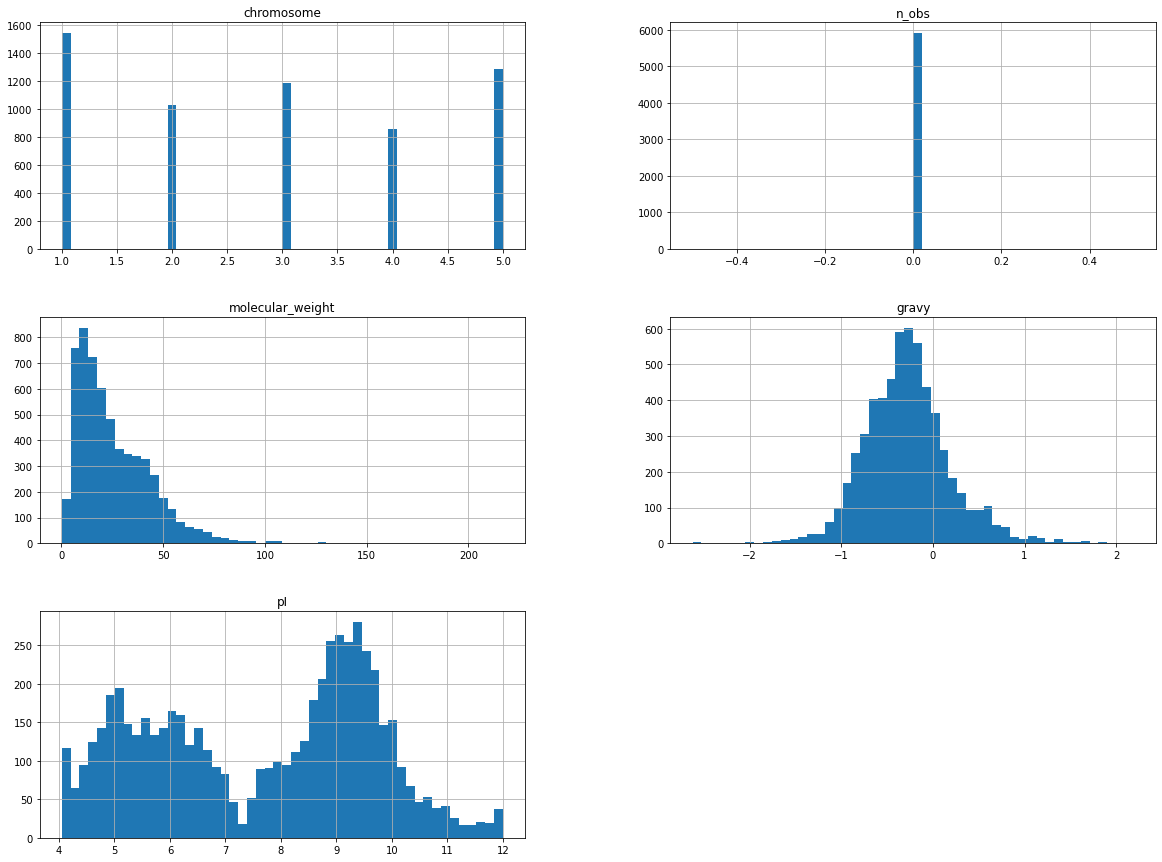

In [9]:
prot_list_other.hist(bins=50, figsize=(20,15))

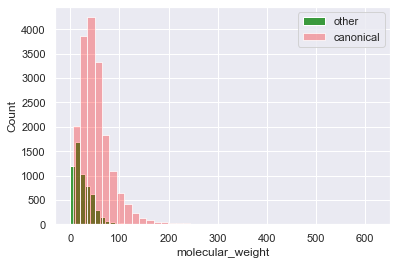

In [10]:
sns.set(style="darkgrid")
sns.histplot(data=prot_list_other, x="molecular_weight", color = 'green', label = "other",  binwidth= 10)
sns.histplot(data=prot_list_canonical, x="molecular_weight", color = 'red', label = "canonical",  alpha = 0.3,binwidth= 15)
plt.legend()
plt.show()


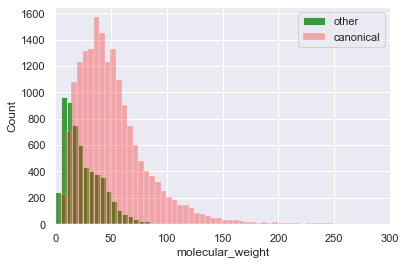

In [11]:
sns.set(style="darkgrid")
a_plot = sns.histplot(data=prot_list_other, x="molecular_weight", color = 'green', label = "other",  binwidth= 5)
b_plot = sns.histplot(data=prot_list_canonical, x="molecular_weight", color = 'red', label = "canonical",  alpha = 0.3,binwidth= 5)
a_plot.set(xlim=(0, 300))
b_plot.set(xlim=(0, 300))
plt.legend()
plt.show()


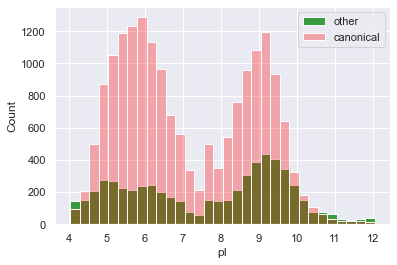

In [14]:
sns.set(style="darkgrid")
a_plot = sns.histplot(data=prot_list_other, x="pI", color = 'green', label = "other",  binwidth= .25)
b_plot = sns.histplot(data=prot_list_canonical, x="pI", color = 'red', label = "canonical",  alpha = 0.3,binwidth= .25)
#a_plot.set(xlim=(0, 300))
#b_plot.set(xlim=(0, 300))
plt.legend()
plt.show()

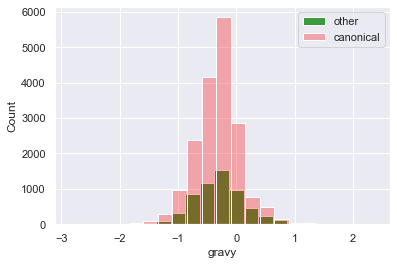

In [15]:
sns.set(style="darkgrid")
a_plot = sns.histplot(data=prot_list_other, x="gravy", color = 'green', label = "other",  binwidth= .25)
b_plot = sns.histplot(data=prot_list_canonical, x="gravy", color = 'red', label = "canonical",  alpha = 0.3,binwidth= .25)
#a_plot.set(xlim=(0, 300))
#b_plot.set(xlim=(0, 300))
plt.legend()
plt.show()